In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read the raw data
data = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv',
                  header=None).values

# make it a 2-D array of size N x D where D = 1
X = data[:,0].reshape(-1, 1)
Y = data[:,1]

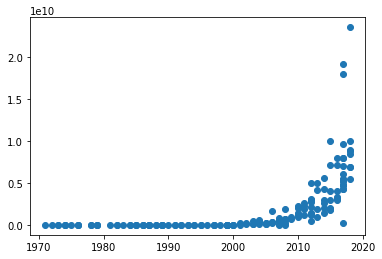

In [3]:
# plot the data (you can see its exponential)
plt.scatter(X,Y)

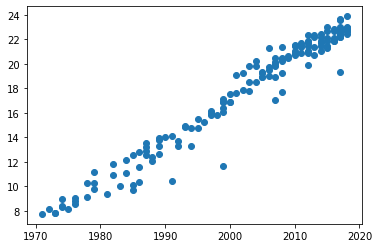

In [4]:
# since we want a linear model, lets take the log
Y = np.log(Y)
plt.scatter(X, Y)

In [5]:
# lets also center the X data so the values are not too large
# we could scale it too but then we'd have to reverse the transformation
X = X - X.mean()

In [6]:
# lets create our TF model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# model.compile(optimizer='adam', loss='mse')

# learning rate scheduler
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 356.3526
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 361.4487
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 340.4820
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 234.5304
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 181.6283
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 127.7990
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 96.1178
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 68.6640
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 44.4078
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 34.2336
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 29.3701
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 19.2758
Epoch 13/200
6/6 [=========================

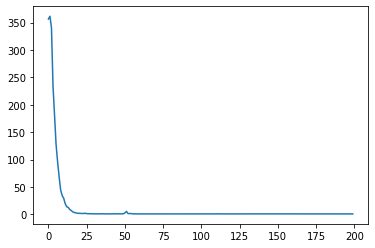

In [7]:
# plot the loss
plt.plot(r.history['loss'], label='loss')

In [8]:
# get the slope of the line
# the slope of the line is related to the doubling rate of transistor count
print(model.layers) # there is only 1 layer the 'input' layer doesnt count
print(model.layers[0].get_weights())

[array([[0.33406267]], dtype=float32), array([17.778316], dtype=float32)]


In [9]:
# the slop of the line is:
a = model.layers[0].get_weights()[0][0, 0]

In [10]:
print('time to double:', np.log(2)/a)

time to double: 2.074901662853048


# Predictions
---

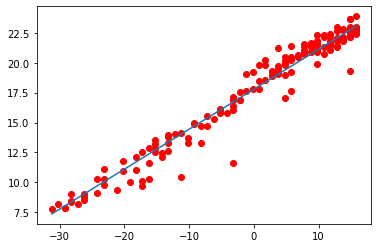

In [12]:
# Make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X, Y, color='red')
plt.plot(X, Yhat)

In [13]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it earlier
X = X.reshape(-1,1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Dont use == for floating points
np.allclose(Yhat, Yhat2)

True